In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

In [73]:
def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] # OBC
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

def guage_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    A_lamb = -1j*num_lamb*wij/(wij**2+ mu**2)
    return A_lamb

In [14]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=8
norm_arr_nonint=np.zeros(muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonint[i]=norm(A_lamb)
    #print norm_arr_nonint[i], mu_arr[i]

In [97]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=8
hz=5.00
norm_arr_int=np.zeros(muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_int[i]=norm(A_lamb)
    #print norm_arr_int[i], mu_arr[i]

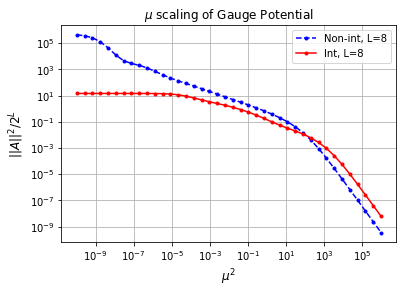

In [98]:
plt.loglog(mu_arr**2,norm_arr_nonint**2/2**8, 'b.--', label='Non-int, L=8')
#plt.loglog(mu_arr**2,norm_arr_nonintL10**2/2**10, 'b+--', label='Non-int, L=10')
plt.loglog(mu_arr**2,norm_arr_int**2/2**8, 'r.-', label='Int, L=8')
#plt.loglog(mu_arr**2,norm_arr_intL10**2/2**10, 'r+-', label='Int, L=10')
plt.xlabel(r"$\mu^2$",fontsize=12)
plt.ylabel(r"$||A||^2/2^L$", fontsize=12)
#plt.xlim((10**(-7),10**5))
#plt.ylim((10**(-10),10**6))
plt.grid()
plt.title("$\mu$ scaling of Gauge Potential")
plt.legend()
#plt.savefig("v1_norm_compar.eps")

In [68]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=10
norm_arr_nonintL10=np.zeros(muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonintL10[i]=norm(A_lamb)

In [69]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=10
hz=10.00
norm_arr_intL10=np.zeros(muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_intL10[i]=norm(A_lamb)

### Fitting of plot

In [6]:
x=np.linspace(0.5,10,100)

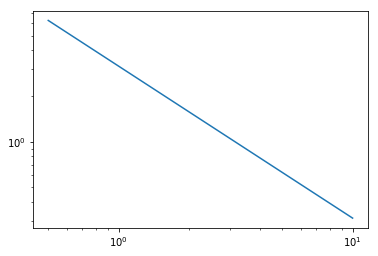

In [9]:
plt.loglog(x, np.pi/x)

In [70]:
from scipy.optimize import curve_fit
def gfunc(x, a,c):
    return a *x**c

[ 2.45815275 -1.50749061]


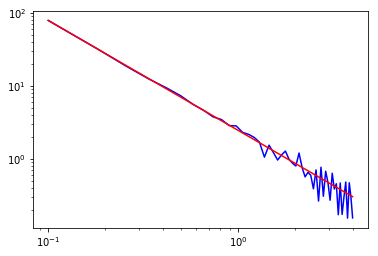

In [79]:
xdata = np.linspace(0.1, 4, 50)
y = gfunc(xdata, 2.5, -1.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.loglog(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(gfunc, xdata, ydata)
plt.loglog(xdata, gfunc(xdata, *popt), 'r-', label='fit')
print popt

In [85]:
def gfunc(x, a,c): #logfunction
    return a+ c*x
xdata =mu_arr
ydata = norm_arr_nonint**2/2**8
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt
#a,b=popt
#print a,b

[-3.71401382 -1.62670152] [[ 0.19038712  0.01251492]
 [ 0.01251492  0.00543516]]


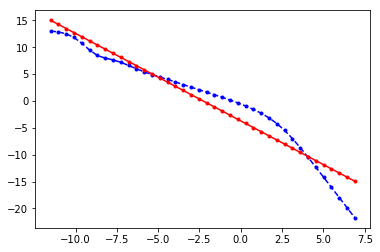

In [84]:
plt.plot(np.log(mu_arr),np.log(norm_arr_nonint**2/2**8), 'b.--')
plt.plot(np.log(mu_arr), gfunc(np.log(mu_arr),*popt), 'r.-', label='fit')

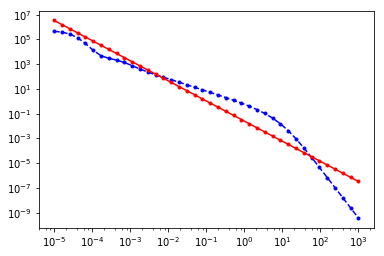

In [95]:
plt.loglog(mu_arr,norm_arr_nonint**2/2**8, 'b.--')
plt.loglog(mu_arr, org_func(mu_arr,np.exp(a_in),b_in), 'r.-', label='fit')

In [11]:
def org_func(x, a,c):
    return a*x**c

In [89]:
a_in,b_in=popt

In [91]:
np.exp(a_in)

0.024379471874568188

In [96]:
b_in

-1.6267015166446712

In [3]:
x1,y1=np.loadtxt("v1.0_L8_nonint_mu_scaling.dat",unpack=True,skiprows=2 )
x2,y2=np.loadtxt("v1.0_L8_int_mu_scaling.dat",unpack=True,skiprows=2 )
x3,y3=np.loadtxt("v1.0_L10_nonint_mu_scaling.dat",unpack=True,skiprows=2 )
x4,y4=np.loadtxt("v1.0_L10_int_mu_scaling.dat",unpack=True,skiprows=2 )
x5,y5=np.loadtxt("v1.0_L12_nonint_mu_scaling.dat",unpack=True,skiprows=2 )
x6,y6=np.loadtxt("v1.0_L12_int_mu_scaling.dat",unpack=True,skiprows=2)

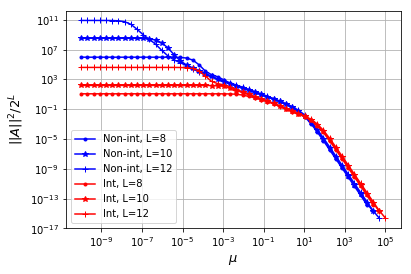

In [37]:
plt.loglog(x1,y1/2**8, 'b.-', label='Non-int, L=8')
plt.loglog(x3,y3/2**10, 'b*-', label='Non-int, L=10')
plt.loglog(x5,y5/2**12, 'b+-', label='Non-int, L=12')
plt.loglog(x2,y2/2**8, 'r.-', label='Int, L=8')
plt.loglog(x4,y4/2**10, 'r*-', label='Int, L=10')
plt.loglog(x6,y6/2**12, 'r+-', label='Int, L=12')
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$\mu$", fontsize=13)
plt.legend(loc='best')
plt.grid()
plt.savefig("new_v1.0_norm_L8_L10_L12.eps")

### Curve fitting

In [2]:
from scipy.optimize import curve_fit
def gfunc(x, a,c): #logfunction
    return a+ c*x

In [53]:
xdata =x1
ydata = y1/2**8
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-3]), np.log(ydata[0:-3]))
print popt

[-5.73388555 -1.23930257]


In [57]:
xdata =x2
ydata = y2/2**8
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-3]), np.log(ydata[0:-3]))
print popt

[-6.98660631 -0.67368417]


In [55]:
xdata =x3
ydata = y3/2**10
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-3]), np.log(ydata[0:-3]))
print popt

[-5.38562294 -1.43799405]


In [58]:
xdata =x4
ydata = y4/2**10
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-3]), np.log(ydata[0:-3]))
print popt

[-6.15849053 -0.77488751]


In [26]:
xdata =x5[36:50]
ydata = y5[36:50]/2**12
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-1]), np.log(ydata[0:-1]))
print popt
a_in,b_in=popt

[ 5.79416298 -3.87595685]


In [32]:
xdata =x5[15:35]
ydata = y5[15:35]/2**12
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-1]), np.log(ydata[0:-1]))
print popt
a_lin,b_lin=popt

[-0.38221431 -1.02377912]


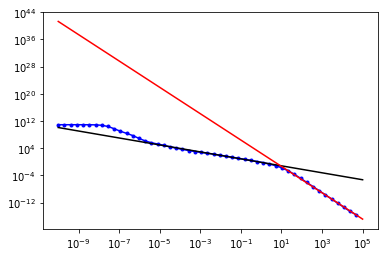

In [34]:
plt.loglog(x5,y5/2**12, 'b.-', label= "Non-int,L=12")
plt.loglog(x5, org_func(x5,np.exp(a_lin),b_lin), 'k-', label='fit')
plt.loglog(x5, org_func(x5,np.exp(a_in),b_in), 'r-', label='fit')

In [60]:
xdata =x6
ydata = y6/2**12
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-1]), np.log(ydata[0:-1]))
print popt

[-6.57081552 -1.1229583 ]


In [62]:
muTot=10
mu_arr=np.logspace(-5,3.0,muTot)

In [ ]:
plt.loglog(x5,y5/2**12, 'b+-', label='Non-int, L=12')
plt.loglog(x5,, 'b*-', label='Fit, L=12')

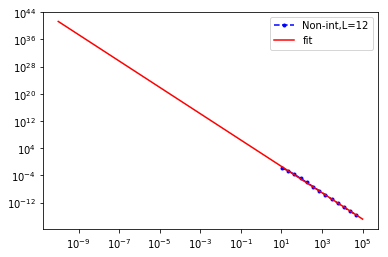

In [27]:
plt.loglog(x5[36:50],y5[36:50]/2**12, 'b.--', label= "Non-int,L=12")
plt.loglog(x5, org_func(x5,np.exp(a_in),b_in), 'r-', label='fit')
plt.legend(loc='best')

In [18]:
x5[40:50]

array([    175.75106249,     355.64803062,     719.685673  ,
          1456.3484775 ,    2947.05170255,    5963.62331659,
         12067.92640639,   24420.53094549,   49417.13361324,  100000.        ])

In [80]:
muTot=1
L=8
mu_arr=1.00000000e+05
norm_arr_nonint=np.zeros(muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonint[i]=norm(A_lamb)
    print norm_arr_nonint**2

[  9.09338278e-16]
